In [4]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [207]:
# Generate some data
mu = 0.2
N = 100

mu_test = np.linspace(0, 1, N)
X = np.random.binomial(1, mu, N)


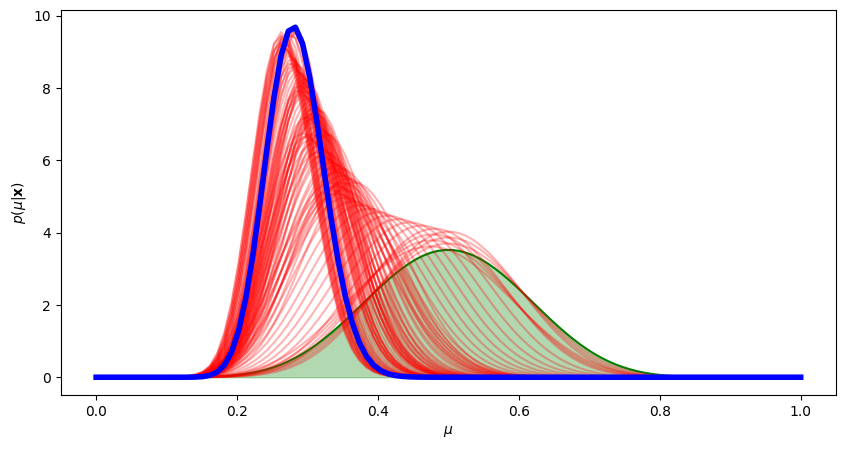

In [208]:

# prior
a = 10
b = 10

prior_mu = beta.pdf(mu_test, a, b)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# plot prior
ax.plot(mu_test, prior_mu, 'g')
ax.fill_between(mu_test, prior_mu, color='green', alpha=0.3)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')

# posterior
def posterior(a, b, X):
    a_n = np.sum(X) + a
    b_n = np.sum(1 - X) + b

    return beta.pdf(mu_test, a_n, b_n)

# lets pick a random (uniform) point from the data
# and update our assumption with this
index = np.random.permutation(X.shape[0])
for i in range(1, N):
    y = posterior(a,b, X[index][:i])
    plt.plot(mu_test,y,'r',alpha=0.3)

y = posterior(a,b,X)
plt.plot(mu_test,y,'b',linewidth=4.0)
